<a href="https://colab.research.google.com/github/daurice/capstone-2/blob/main/Doris_mugah_Batch10_Capstone_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries.
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix,make_scorer,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the csv file
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/capstone project/House_Price_Prediction.csv')

In [ ]:
#viewing the first 5 rows of the dataset
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,0,42000,8.674197,3.0,1,2,1,1,0,1,0,0,0
1,1,38500,8.294050,2.0,1,1,0,1,0,0,0,0,0
2,2,49500,8.026170,3.0,1,1,0,1,0,0,0,0,0
3,3,60500,8.802372,3.0,1,2,0,1,1,0,0,0,0
4,4,61000,8.757784,3.0,1,1,0,1,0,0,0,0,0


In [ ]:
#checking for non-null entries, data types,no of columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    551 non-null    int64  
 1   price         551 non-null    int64  
 2   lotsize       551 non-null    float64
 3   bedrooms      551 non-null    float64
 4   bathrms       551 non-null    int64  
 5   stories       551 non-null    int64  
 6   garagepl      551 non-null    int64  
 7   driveway_yes  551 non-null    int64  
 8   recroom_yes   551 non-null    int64  
 9   fullbase_yes  551 non-null    int64  
 10  gashw_yes     551 non-null    int64  
 11  airco_yes     551 non-null    int64  
 12  prefarea_yes  551 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 56.1 KB


In [ ]:
#getting the count,mean,std,min,1st,2nd and 3rd quartile ,max
df.describe()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,275.000000,68445.811252,8.470413,2.967332,1.286751,1.820327,0.698730,0.860254,0.177858,0.346642,0.045372,0.321234,0.232305
std,159.204271,26848.486040,0.399086,0.732880,0.502165,0.881334,0.863386,0.347038,0.382741,0.476333,0.208308,0.467375,0.422686
min,0.000000,25000.000000,7.408531,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.500000,49500.000000,8.188689,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,275.000000,62500.000000,8.433812,3.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,412.500000,82950.000000,8.757784,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,550.000000,190000.000000,9.692767,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#checking for null values
df.isnull().sum()

,0
Unnamed: 0,0
price,0
lotsize,0
bedrooms,0
bathrms,0
stories,0
garagepl,0
driveway_yes,0
recroom_yes,0
fullbase_yes,0


In [ ]:
#checking for duplicates and printing
duplicate=df[df.duplicated()]
if duplicate.empty:
 print("No duplicate")
else:
  print("Duplicates available",duplicate)

#dropping duplicates
df = df.drop_duplicates(keep='first')


No duplicate


In [ ]:
#dropping the first column
print(df.columns)
if"Unnamed: 0"in df.columns:
  df= df.drop("Unnamed: 0",axis=1)
print(f"Column have been dropped{df.columns}")

Index(['Unnamed: 0', 'price', 'lotsize', 'bedrooms', 'bathrms', 'stories',
       'garagepl', 'driveway_yes', 'recroom_yes', 'fullbase_yes', 'gashw_yes',
       'airco_yes', 'prefarea_yes'],
      dtype='object')
Column have been droppedIndex(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl',
       'driveway_yes', 'recroom_yes', 'fullbase_yes', 'gashw_yes', 'airco_yes',
       'prefarea_yes'],
      dtype='object')


In [ ]:
#checking on the shape of the dataframe
df.shape

(551, 12)

<Figure size 2000x1800 with 0 Axes>

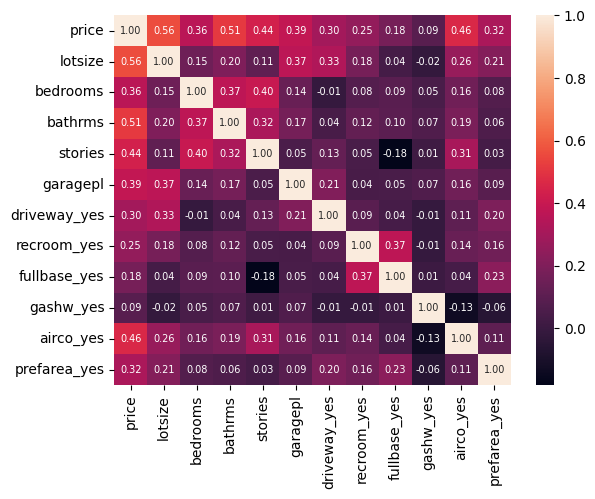

<Figure size 2000x1800 with 0 Axes>

In [ ]:
#viewing correlation using heatmap
sns.heatmap(df.corr(numeric_only=True),annot=True,annot_kws={"size":7},fmt=".2f")
plt.figure(figsize=(20,18))

In [ ]:
#intialize x independent variables
x=df.iloc[:,1:12]
x

,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,8.674197,3.0,1,2,1,1,0,1,0,0,0
1,8.294050,2.0,1,1,0,1,0,0,0,0,0
2,8.026170,3.0,1,1,0,1,0,0,0,0,0
3,8.802372,3.0,1,2,0,1,1,0,0,0,0
4,8.757784,3.0,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
546,8.699515,3.0,2,4,1,1,0,0,0,1,0
547,8.699515,3.0,2,3,0,1,0,0,0,1,0
548,8.699515,3.0,1,4,2,1,1,0,0,1,0
549,8.853665,3.0,1,4,2,1,0,0,0,1,0


In [ ]:
#intialize Y dependent variable
Y=df.iloc[:,0]
Y

,price
0,42000
1,38500
2,49500
3,60500
4,61000
...,...
546,107500
547,108000
548,113750
549,120000


1. Data Splitting – Split the data into training and testing datasets.

In [ ]:
#splitting the Test and Train data set and intializing x_train,x_test,Y_train,Y_test
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)
print("xtrain shape:", x_train.shape,"\n" "xtest shape:",x_test.shape,"\n" "Ytrain shape",Y_train.shape, "\n" "Ytest shape",Y_test.shape)


xtrain shape: (440, 11) 
xtest shape: (111, 11) 
Ytrain shape (440,) 
Ytest shape (111,)


2. Build the linear regression model using training dataset

In [ ]:
#fitting the linear regression model
model=LinearRegression()
model.fit(x_train,Y_train)



LinearRegression()

In [ ]:
#finding the coefficient and Intercept
Coef_model=model.coef_
Coef_model
intercept_model=model.intercept_
intercept_model
print(f"coefficient:{Coef_model}" "\n" f"intercept:{intercept_model}")

coefficient:[19056.8714323   1617.12766738 13851.41411857  6944.38631783
  5162.1533645   6070.09346706  5116.91276645  6422.60269769
 14810.95910614 12659.96258895  9113.65267641]
intercept:-146830.45300801366


3. Make predictions using the built model on test dataset

In [ ]:
#predicting using the X_test
Y_predict=model.predict(x_test)
Y_predict.shape



(111,)

In [ ]:
#printing the first 5 of Y_predict and Y_test
print(Y_predict[:5])
print(Y_test[:5])


[103179.04700313  41521.62293677  44407.52759186  74410.37205201
  58562.74046267]
546    107500
81      35000
140     56000
79      63900
271     63000
Name: price, dtype: int64


4. Evaluate model using appropriate evaluation metrics. [MAE, RMSE, R SQUARED SCORE]

In [ ]:
#evaluating the model
#Calculating the Mean Absolute Error
MAE=mean_absolute_error(Y_test,Y_predict)
MSE=mean_squared_error(Y_test,Y_predict)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,Y_predict)
print(f"Mean Absolute Error:{MAE}" ,"\n" f"Mean Squared Error:{MSE}","\n" f"Root Mean Squared Error:{RMSE}","\n" f"Mean Squared Error:{MSE}","\n" f"Root Squared Score:{r2}")




Mean Absolute Error:10714.764314067523 
Mean Squared Error:194298447.52374828 
Root Mean Squared Error:13939.097801642267 
Mean Squared Error:194298447.52374828 
Root Squared Score:0.6882689167411489


1. Build the linear regression model by applying hyperparameter tuning using
GridSearchCV.
2. Display the result of GridSearchCV for linear regression model such as
model_name, best_score_ and best_params_

In [ ]:
#define the hyperparameter grid
para_grids={"fit_intercept":[True,False],}
#intializing the GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=para_grids,cv=5,scoring='r2',verbose=10,n_jobs=-2)
#Fitting the training data into the model
grid_search.fit(x_train,Y_train)
#Getting the best parameters and score
best_model=grid_search.best_estimator_
print(f"Best Model:{best_model}")
best_parameters=grid_search.best_params_
print(f"Best Parameter:{best_parameters}")
best_score=grid_search.best_score_
print(f"Best Score :{best_score}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START fit_intercept=True..........................................
[CV 1/5; 1/2] END ...........fit_intercept=True;, score=0.643 total time=   0.0s
[CV 2/5; 1/2] START fit_intercept=True..........................................
[CV 2/5; 1/2] END ...........fit_intercept=True;, score=0.682 total time=   0.0s
[CV 3/5; 1/2] START fit_intercept=True..........................................
[CV 3/5; 1/2] END ...........fit_intercept=True;, score=0.637 total time=   0.0s
[CV 4/5; 1/2] START fit_intercept=True..........................................
[CV 4/5; 1/2] END ...........fit_intercept=True;, score=0.657 total time=   0.0s
[CV 5/5; 1/2] START fit_intercept=True..........................................
[CV 5/5; 1/2] END ...........fit_intercept=True;, score=0.606 total time=   0.0s
[CV 1/5; 2/2] START fit_intercept=False.........................................
[CV 1/5; 2/2] END ..........fit_intercept=False;,

cancer-dataset solution


In [ ]:
#Reading the data set
df2=pd.read_csv("/content/drive/MyDrive/Machine Learning/capstone project/cancer-data-2.csv")


In [ ]:
#veiwing the first 5 rows
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#checking for non-null entries, data types,no of columns and rows
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
#checking for null values
df2.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
#checking for duplicates
dups=df2[df2.duplicated()]
if dups.empty:
    print('No duplicate')
else:
    print(f'Duplicate{dups}')

No duplicate


In [ ]:
#checking correlation
df2.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
#viewing the shape of df2
df2.shape


(569, 31)

In [ ]:
#selecting the feature columns
X=df2.iloc[:,1:32]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#viewing the shape of X
X.shape

(569, 30)

In [ ]:
#selecting the Target column
y=df2.iloc[:,0]
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


1. Data Splitting – Split the data into training and testing datasets.

In [ ]:
#Spliting the data into the test and train dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
#Printing the shape
print(f"X_train{X_train.shape}","\n" f"X_test{X_test.shape}","\n" f"y_train{y_train.shape}","\n" f"y_test{y_test.shape}")

X_train(455, 30) 
X_test(114, 30) 
y_train(455,) 
y_test(114,)


2. Build the classification model using training dataset

In [ ]:
#Using the RandomForest and  Fit the model on the training data
model2=RandomForestClassifier(n_estimators=121,criterion="entropy")
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=121)

3. Make predictions using the built model on test dataset.

In [ ]:
#Predicting y_Pred using the model
y_pred=model2.predict(X_test)
y_pred.shape

(114,)

4. Evaluate model using appropriate evaluation metrics. [print confusion matrix and
classification report]

Confusion Matrix[[65  4]
 [ 3 42]]


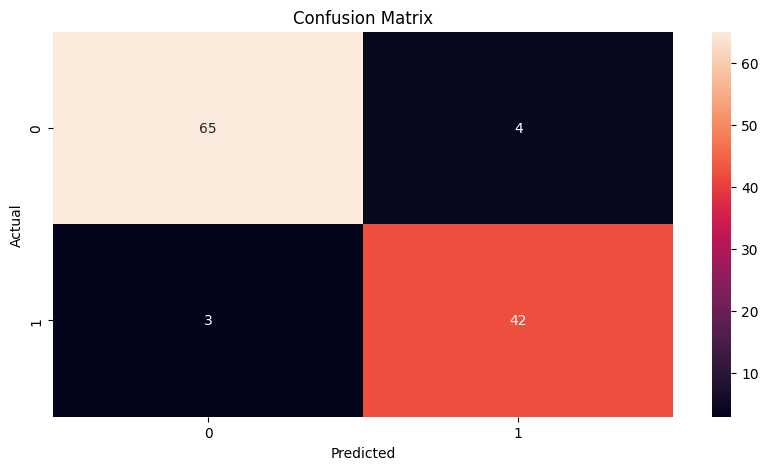

In [ ]:
#Evaluating using the confusion matrix and classification report.
conf_matrix=confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix{conf_matrix}")
#plotting the confusion matrix on a heat map
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [ ]:
#Classification Report
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        69
           1       0.91      0.93      0.92        45

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



1,Build Random Forest Classifier classification model by applying hyperparameter
tuning using GridSearchCV.

In [ ]:
#Hyperparameter tuning using GridSearchCV
#defines the hyperparameter grid
para2={"n_estimators":range(1,400,5),
       "criterion":["gini",'entropy']}
#instantiate the RandomForestClassifier()
rand_f=RandomForestClassifier()

grid=GridSearchCV(rand_f,para2,cv=5,scoring='accuracy')
grid.fit(X,y)
print(f"best parameter{grid.best_params_}", "\n" f"best estimator{grid.best_estimator_}","\n"f"best score{grid.best_score_}")






best parameter{'criterion': 'entropy', 'n_estimators': 66} 
best estimatorRandomForestClassifier(criterion='entropy', n_estimators=66) 
best score0.9701288619779536


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
